In [403]:
import pandas as pd
import numpy as np
from statistics import *
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

1.a

In [404]:
df=pd.read_csv('blobData.txt', header=None)
df.columns=['attribute1','attribute2','class']

In [405]:
x=df[['attribute1','attribute2']]
y=df['class']

In [406]:
sgdc=SGDClassifier()

In [407]:
sgdc.fit(x,y)

SGDClassifier()

In [408]:
sgdc.score(x,y)

0.45

1.b

In [295]:
Featureextraction=PolynomialFeatures(degree=2)
x1=Featureextraction.fit_transform(x)
x1=pd.DataFrame(x1)
df2=pd.concat([x1,y],axis=1)
xmodel1=df2[[0,1,2,3,4,5]]
ymodel1=df2['class']
sgdc=SGDClassifier()
sgdc.fit(xmodel1,ymodel1)
sgdc.score(xmodel1,ymodel1)

0.97

2.a

In [296]:
accur=cross_val_score(sgdc, x, y, cv=8)
mean(accur)

0.4391025641025641

In [297]:
accur2=cross_val_score(sgdc, xmodel1, ymodel1, cv=8)
mean(accur2)

0.9086538461538461

2.b

In [411]:
count1 = []
count2 = []
count3 = []
deg = [2,4,6]

for i in deg:
    Featureextraction = PolynomialFeatures(degree = i)
    x3 = Featureextraction.fit_transform(x)
    x3 = pd.DataFrame(x3)
    data3 = pd.concat([x3,y],axis=1)
    sgdc = SGDClassifier()
    sgdc.fit(x3,y)
    for j in range(1000):
        cross3 = cross_val_score(classifier3,x3,y,cv=8)
        acc = mean(cross3)
        if i == 2:
            count1.append(acc)
        if i == 4:
            count2.append(acc)
        if i == 6:
            count3.append(acc)
            
print(mean(count1))
print(mean(count2))
print(mean(count3))




0.9327692307692308
0.8874254807692308
0.7368838141025641


3.a

In [304]:
Featureextraction=PolynomialFeatures(degree=2)
x1=Featureextraction.fit_transform(x)
x1=pd.DataFrame(x1)
df2=pd.concat([x1,y],axis=1)
xmodel1=df2[[0,1,2,3,4,5]]
ymodel1=df2['class']


In [305]:
coef1=[]
coef2=[]
coef3=[]
coef4=[]
coef5=[]
coef6=[]
intercept=[]

for i in range(1000):
    sgdc=SGDClassifier()
    sgdc.fit(xmodel1,ymodel1)
    a=sgdc.coef_
    b=sgdc.intercept_
    coef1.append(a[0][0])
    coef2.append(a[0][1])
    coef3.append(a[0][2])
    coef4.append(a[0][3])
    coef5.append(a[0][4])
    coef6.append(a[0][5])
    intercept.append(float(b))


In [306]:
print(mean(coef1),mean(coef2),mean(coef3),mean(coef4),mean(coef5),mean(coef6), mean(intercept))

-120.979336870048 0.8937317115499812 -1.1212306155553253 64.97548605127517 3.8794575947780543 62.85778810003764 -271.1605882732916


3.b

In [376]:
#equation: -120.979+64.975x1^2+62.8577x2^2-271.16=0
xb1=[]
xb2=[]
for i in np.arange(-2.4,2.5,.05):
    prex=(392.1395-64.975*(i**2))/(62.857)
    x2=np.sqrt(prex)
    xb2.append(x2)
    xb1.append(i)


In [412]:
-120.979-271.16

-392.139

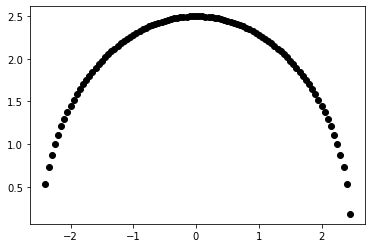

In [377]:
one=plt.scatter(xb1,xb2,color='k')

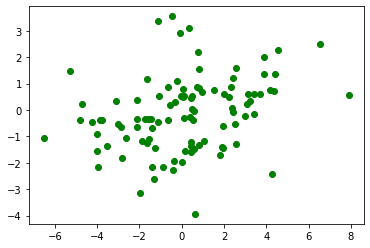

In [378]:
two=plt.scatter(df['attribute1'],df['attribute2'],color='g')

<AxesSubplot:xlabel='attribute1', ylabel='attribute2'>

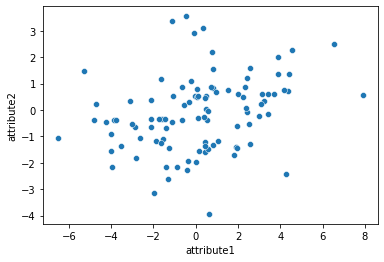

In [390]:
sns.scatterplot(data=df,x='attribute1',y='attribute2')

<AxesSubplot:>

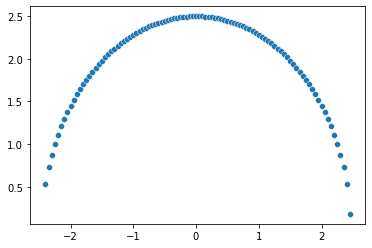

In [391]:
sns.scatterplot(x=xb1,y=xb2)

4.a

In [307]:
n=1000
counter=0
for i in range(1000):
    special=[0,1,2,3,4]
    d= np.arange(100)
    np.random.shuffle(d)
    training=d[0:75]
    test=d[75:]
    if all(item in training for item in special):
        counter+=1

In [308]:
percent=round(counter/n,3)
percent

0.237

4.b

In [309]:
error=round(1/np.sqrt(n),3)
upperconf=round(percent+error,3)
lowerconf=round(percent-error,3)
print(error)
print(upperconf)
print(lowerconf)

0.032
0.269
0.205


The smallest possible error is 0. From below, we can see that the error term quickly decreases as the number of runs increases. Thus, as the number of runs increases towards infinity, the error term will eventually reach close to 0.

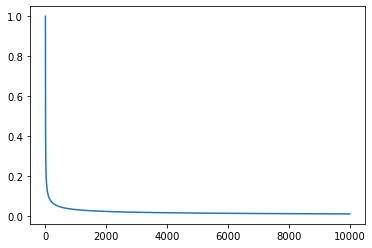

In [310]:
yexample=[]
xexample=[]
for i in range(1,10000):
    yexample.append(1/np.sqrt(i))
    xexample.append(i)

plt.plot(xexample,yexample)


4.c

In [311]:
count4c=1 #so it is inclusive of final run
for i in range(1,10000000):
    error=round(1/np.sqrt(i),3)
    if error!=0:
        count4c+=1
    if error==0:
        break

print(count4c)

4000000


In [312]:
n2=count4c
counter2=0
for i in range(n2):
    special=[0,1,2,3,4]
    d= np.arange(100)
    np.random.shuffle(d)
    training=d[0:75]
    test=d[75:]
    if all(item in training for item in special):
        counter2+=1

In [313]:
percent2=round(counter2/n2,3)
percent2

0.229

In [314]:
error2=round(1/np.sqrt(n2),3)
upperconf2=round(percent2+error2,3)
lowerconf2=round(percent2-error2,3)
print(error2)
print(upperconf2)
print(lowerconf2)

0.0
0.229
0.229
